# dataset

In [3]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import time

from scripts.get_top_stocks import *
from scripts.generate_dataset_features import *
from scripts.utils import *
from scripts.dataloader import *
from scripts.train_predict import *
from scripts.models import *

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
# common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# # specify variables for dataset generation
# start_date = '2023-01-01'
# end_date = '2024-08-01'
# interval = "1h"
# trading_days_per_year = 252
# hours_per_day = 6.5

In [5]:
# df = get_all_stock_features_df(
#     stocks_list=common_top_stocks,
#     start_date=start_date,
#     end_date=end_date,
#     interval=interval,
#     trading_days_per_year=trading_days_per_year, 
#     hours_per_day=hours_per_day)

In [6]:
# df.to_csv("temp.csv",index=False)

In [6]:
df = pd.read_csv("temp.csv")

In [7]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,25.059999,25.139999,25.030001,25.055000,25.055000,3058688,-0.000399,-0.139479,-0.138424,...,-0.120948,-0.120755,-0.113819,1.289777,0.353083,0.940150,-0.890001,-1.09,0.002790,INTC
1,2023-02-24 14:30:00-05:00,25.055000,25.330000,25.030001,25.125000,25.125000,4665744,0.002790,0.086240,0.208048,...,-0.117678,-0.118110,-0.111179,1.302022,0.353139,0.941360,-0.700001,-1.09,0.000995,INTC
2,2023-02-24 15:30:00-05:00,25.125000,25.174999,25.040001,25.150000,25.150000,6217337,0.000995,0.114885,0.142569,...,-0.115997,-0.117051,-0.109950,1.313630,0.353133,0.943892,-0.865002,-1.09,0.002581,INTC
3,2023-02-27 09:30:00-05:00,25.549999,25.580000,25.209999,25.215000,25.215000,6807098,0.002581,0.064116,0.045281,...,-0.112927,-0.114588,-0.107258,1.324797,0.353149,0.944205,-0.629999,0.31,-0.005169,INTC
4,2023-02-27 10:30:00-05:00,25.218300,25.250000,25.040001,25.084999,25.084999,5182623,-0.005169,-0.072445,-0.135489,...,-0.116693,-0.118950,-0.111556,1.337418,0.353314,0.937231,-0.790001,0.31,-0.001197,INTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,473.820007,475.260010,471.769989,473.769989,473.769989,1751198,0.000148,-0.161092,-0.342124,...,-0.029712,-0.048297,-0.043341,20.204107,0.301629,0.945743,2.490021,0.68,-0.001162,META
76727,2024-07-31 11:30:00-04:00,473.730011,475.000000,472.880005,473.220001,473.220001,1342196,-0.001162,-0.156181,-0.132218,...,-0.030606,-0.049226,-0.044301,20.262393,0.300908,0.952690,1.119995,0.68,-0.002506,META
76728,2024-07-31 12:30:00-04:00,473.119995,475.929993,471.220001,472.035400,472.035400,1547612,-0.002506,-0.009179,0.071083,...,-0.032784,-0.051425,-0.046520,20.325751,0.300964,0.950867,3.709991,0.68,0.001407,META
76729,2024-07-31 13:30:00-04:00,472.059998,473.970001,469.420013,472.700012,472.700012,1553672,0.001407,-0.001773,0.001954,...,-0.031185,-0.049895,-0.045002,20.385228,0.300744,0.947828,3.549988,0.68,-0.001440,META


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,EMACloseDiff2,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,7.673100e+04,76731.000000,76731.000000,76731.000000,76731.000000,...,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000,76731.000000
mean,371.761316,373.441401,370.041506,371.766891,371.766891,2.017051e+06,0.000243,-0.038266,-0.001630,0.000108,...,0.015391,0.034515,0.035517,0.032282,18.189397,0.388447,1.087514,2.399895,0.140402,0.000245
std,597.045099,599.019360,594.961089,597.040646,597.040646,5.025895e+06,0.010195,0.194837,0.283218,0.003606,...,1.089222,0.080795,0.095520,0.083883,26.508208,0.151305,0.193778,6.008196,0.773016,0.010195
min,22.488001,22.783991,22.297001,22.584351,22.584351,0.000000e+00,-0.307408,-1.000000,-1.000000,-0.107576,...,-1.000000,-0.351848,-0.356385,-0.317741,0.513079,0.144640,0.571536,-1.000000,-2.160000,-0.307408
25%,110.000000,110.615002,109.449947,110.000000,110.000000,1.692560e+05,-0.003305,-0.157494,-0.178328,-0.001184,...,-0.484463,-0.013779,-0.020432,-0.020236,4.989625,0.286651,0.976981,-0.170099,-0.330000,-0.003305
50%,195.089996,196.085007,194.119995,195.160004,195.160004,3.998080e+05,0.000176,-0.041352,-0.015983,0.000092,...,-0.244291,0.031881,0.030479,0.029513,9.495397,0.353498,1.066648,0.620010,0.160000,0.000176
75%,350.000000,352.079987,348.282806,350.177490,350.177490,1.411974e+06,0.003614,0.091581,0.161225,0.001355,...,0.178533,0.075850,0.081795,0.078799,18.677525,0.443106,1.165910,2.323257,0.680000,0.003618
max,4135.640137,4144.319824,4126.919922,4142.520020,4142.520020,1.678987e+08,0.264883,0.490483,1.000000,0.085327,...,37.381413,0.872957,1.121935,0.723371,231.590475,1.387569,3.738774,211.869995,2.180000,0.264883


# remove outliers
* remove rows for features that have points that are 4 std_dev away from mean

In [15]:
features = df.columns[8:-4]
# print(len(features))

rows_indices_to_remove = []
for feature in features:
    feature_arr = df[feature].to_numpy()
    # break

    std_dev = np.std(feature_arr)
    mean_ = np.mean(feature_arr)
    for i in range(len(feature_arr)):
        current = feature_arr[i]
        if current < mean_ - 4 * std_dev or current > mean_ + 4 * std_dev:
            rows_indices_to_remove.append(i)

rows_indices_to_remove = set(rows_indices_to_remove)
print(len(rows_indices_to_remove))

7853


In [16]:
df = df.reset_index(drop=True)
df = df.drop(rows_indices_to_remove)
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,25.059999,25.139999,25.030001,25.055000,25.055000,3058688,-0.000399,-0.139479,-0.138424,...,-0.120948,-0.120755,-0.113819,1.289777,0.353083,0.940150,-0.890001,-1.09,0.002790,INTC
1,2023-02-24 14:30:00-05:00,25.055000,25.330000,25.030001,25.125000,25.125000,4665744,0.002790,0.086240,0.208048,...,-0.117678,-0.118110,-0.111179,1.302022,0.353139,0.941360,-0.700001,-1.09,0.000995,INTC
2,2023-02-24 15:30:00-05:00,25.125000,25.174999,25.040001,25.150000,25.150000,6217337,0.000995,0.114885,0.142569,...,-0.115997,-0.117051,-0.109950,1.313630,0.353133,0.943892,-0.865002,-1.09,0.002581,INTC
3,2023-02-27 09:30:00-05:00,25.549999,25.580000,25.209999,25.215000,25.215000,6807098,0.002581,0.064116,0.045281,...,-0.112927,-0.114588,-0.107258,1.324797,0.353149,0.944205,-0.629999,0.31,-0.005169,INTC
4,2023-02-27 10:30:00-05:00,25.218300,25.250000,25.040001,25.084999,25.084999,5182623,-0.005169,-0.072445,-0.135489,...,-0.116693,-0.118950,-0.111556,1.337418,0.353314,0.937231,-0.790001,0.31,-0.001197,INTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,473.820007,475.260010,471.769989,473.769989,473.769989,1751198,0.000148,-0.161092,-0.342124,...,-0.029712,-0.048297,-0.043341,20.204107,0.301629,0.945743,2.490021,0.68,-0.001162,META
76727,2024-07-31 11:30:00-04:00,473.730011,475.000000,472.880005,473.220001,473.220001,1342196,-0.001162,-0.156181,-0.132218,...,-0.030606,-0.049226,-0.044301,20.262393,0.300908,0.952690,1.119995,0.68,-0.002506,META
76728,2024-07-31 12:30:00-04:00,473.119995,475.929993,471.220001,472.035400,472.035400,1547612,-0.002506,-0.009179,0.071083,...,-0.032784,-0.051425,-0.046520,20.325751,0.300964,0.950867,3.709991,0.68,0.001407,META
76729,2024-07-31 13:30:00-04:00,472.059998,473.970001,469.420013,472.700012,472.700012,1553672,0.001407,-0.001773,0.001954,...,-0.031185,-0.049895,-0.045002,20.385228,0.300744,0.947828,3.549988,0.68,-0.001440,META


In [17]:
# # this is the csv without the target column, if not saved, just uncomment and run the previous 2 cells

# df = pd.read_csv("temp.csv")

In [18]:
def set_target(val):
    if val > 0.002:
        return 2
    elif val < -0.002:
        return 0
    else:
        return 1

df['Target'] = df["Log_Return_shift"].apply(lambda x: set_target(x))
df.Target.value_counts()

Target
2    24177
0    22520
1    22181
Name: count, dtype: int64

In [23]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Target == 2)]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Target == 0)]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


In [25]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.5, 0.45, 0.05
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((34439, 77), (30995, 77), (3444, 77))

In [27]:
# df.columns, df.columns[8:-4]

In [29]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

65
(34439, 65) (34439,)
(30995, 65) (30995,)
(3444, 65) (3444,)


In [31]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [33]:
# standardise the values and PCA

from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
# pca = PCA(n_components = 0.95)
selector = SelectKBest(k=20)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)
X_train = selector.fit_transform(X_train,y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((34439, 20), (34439,), (30995, 20), (30995,), (3444, 20), (3444,))

In [35]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    12259
0    11632
1    10548
Name: count, dtype: int64
Target
2    10788
1    10632
0     9575
Name: count, dtype: int64
Target
0    1313
2    1130
1    1001
Name: count, dtype: int64


# pytorch model

In [388]:
# check dataset

print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape)
print(type(X_train),type(X_val),type(X_test))
print(type(y_train),type(y_val),type(y_test))

(40390, 20) (40390,) (36351, 20) (36351,) (4039, 20) (4039,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [390]:
# get_numpy_value_counts(y_train),get_numpy_value_counts(y_val),get_numpy_value_counts(y_test)

In [392]:
# define dataset
train_dataset = StockDataset(X=X_train,y=y_train)
val_dataset = StockDataset(X=X_val,y=y_val)
test_dataset = StockDataset(X=X_test,y=y_test)

print(train_dataset.X.shape,val_dataset.X.shape,test_dataset.X.shape)
print(train_dataset.y.shape,val_dataset.y.shape,test_dataset.y.shape)

# define dataloaders
batch_size = 2048

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True) # set all shuffle=False since its sequential data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# # print to check shape of batches
# for _, batch in enumerate(train_loader):
#     x_batch, y_batch = batch
#     print(x_batch.shape, y_batch.shape)
#     print(x_batch[0], y_batch[0])
#     break

torch.Size([40390, 20]) torch.Size([36351, 20]) torch.Size([4039, 20])
torch.Size([40390]) torch.Size([36351]) torch.Size([4039])


In [472]:
model

FCN(
  (fcn): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

epoch 0
model epoch 0 saved as fcn.pt
Epoch 1/100, train loss: 1.2215, val loss: 1.0936, time_taken: 0.6
train acc: 35.86, val_acc: 40.09
epoch 1
model epoch 1 saved as fcn.pt
Epoch 2/100, train loss: 1.1211, val loss: 1.0823, time_taken: 0.6
train acc: 36.41, val_acc: 39.69
epoch 2
Epoch 3/100, train loss: 1.1081, val loss: 1.0831, time_taken: 0.6
train acc: 37.33, val_acc: 40.32
epoch 3
Epoch 4/100, train loss: 1.1076, val loss: 1.0825, time_taken: 0.5
train acc: 36.99, val_acc: 40.23
epoch 4
model epoch 4 saved as fcn.pt
Epoch 5/100, train loss: 1.1036, val loss: 1.0815, time_taken: 0.6
train acc: 37.32, val_acc: 40.4
epoch 5
model epoch 5 saved as fcn.pt
Epoch 6/100, train loss: 1.1012, val loss: 1.0814, time_taken: 0.6
train acc: 37.34, val_acc: 40.49
epoch 6
model epoch 6 saved as fcn.pt
Epoch 7/100, train loss: 1.0979, val loss: 1.0811, time_taken: 0.6
train acc: 37.42, val_acc: 40.5
epoch 7
model epoch 7 saved as fcn.pt
Epoch 8/100, train loss: 1.0958, val loss: 1.0806, time_ta

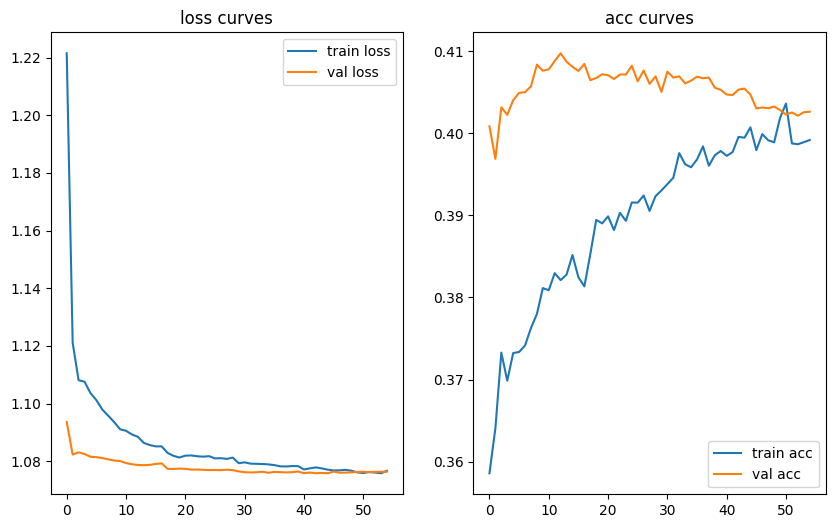

In [400]:
# define model inputs

device = torch.device('cpu')
lr= 1e-3
epochs = 100
scheduler_factor=0.5
scheduler_patience=3
early_stopping_limit = 10
class_weights = [0.889795540181605, 0.6693186731731422, 0.5517017728086973]
criterion = 'cross'
num_features = 20
num_classes = 3

model, train_losses, val_losses, train_accs, val_accs = train(
    device=device,
    lr=lr,
    epochs=epochs,
    scheduler_factor=scheduler_factor,
    scheduler_patience=scheduler_patience,
    early_stopping_limit=early_stopping_limit,
    class_weights=class_weights,
    criterion=criterion,
    train_loader=train_loader,
    val_loader=val_loader,
    num_features=num_features,
    num_classes=num_classes
)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

overall test accuracy: 39.14
acc-sell: 22.89
acc-hold: 56.669
acc-buy: 40.589


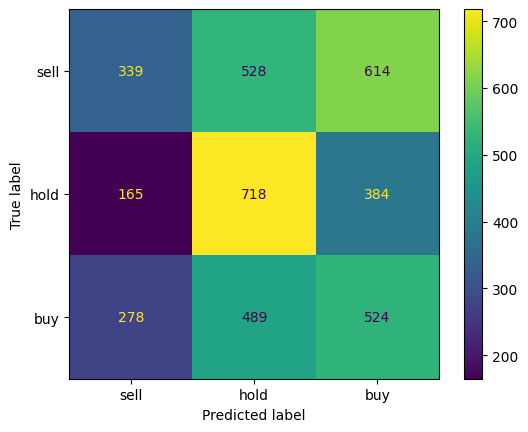

In [401]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

best_model_path = 'fcn.pt'
model = FCN(
    num_features=num_features,
    num_classes=num_classes
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()


X_test2 = torch.tensor(X_test, dtype=torch.float32)
y_test2 = torch.tensor(y_test, dtype=torch.float32)

preds = model(X_test2)
softmax_preds = nn.Softmax(dim=1)(preds)
_, class_preds = torch.max(preds, dim=1)

test_acc = accuracy_score(class_preds,y_test2)
print(f"overall test accuracy: {round(test_acc*100,2)}")

labels = ["sell","hold","buy"]
label_mapping = {i:labels[i] for i in range(len(labels))}

cm = confusion_matrix(y_test2, class_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
for i in range(len(cm)):
    print(f"acc-{label_mapping[i]}: {round(cm[i,i]/sum(cm[i])*100,3)}")

disp.plot()
plt.show()

In [418]:
# check softmax values

nn.Softmax(dim=1) (preds)

tensor([[0.2914, 0.4463, 0.2624],
        [0.3319, 0.3308, 0.3373],
        [0.3442, 0.3493, 0.3065],
        ...,
        [0.3639, 0.2743, 0.3618],
        [0.2639, 0.4386, 0.2975],
        [0.2376, 0.5022, 0.2603]], grad_fn=<SoftmaxBackward0>)

In [207]:
softmax_preds.shape

torch.Size([4039, 3])

In [406]:
def threshold_pred(softmax_pred,thre_buy=0.7,thre_sell=0.7):
    if softmax_pred[2] >= thre_buy:
        return 2
    elif softmax_pred[0] >= thre_sell:
        return 0
    else:
        # just hold
        return 1

def get_threshold_preds(softmax_preds,thre_buy=0.7,thre_sell=0.7):
    res = []
    for softmax_pred in softmax_preds:
        pred = threshold_pred(softmax_pred,thre_buy,thre_sell)
        res.append(pred)
    return res

accuracy: 37.91


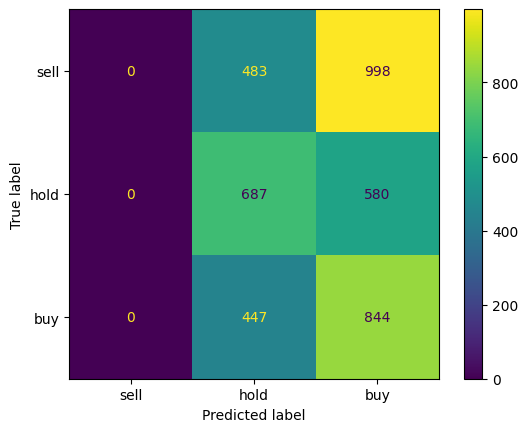

In [422]:
thre_preds = get_threshold_preds(softmax_preds,thre_buy=0.33,thre_sell=0.5)

acc = accuracy_score(thre_preds,y_test)
print(f"accuracy: {round(acc*100,2)}")

cm = confusion_matrix(y_test, thre_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

# predict indiv stocks

In [435]:
## predict on indiv stocks

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    stock_X_test = scaler.transform(stock_X_test)
    stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()
    stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

    stock_preds = model(stock_X_test)
    softmax_preds = nn.Softmax(dim=1)(stock_preds)
    _, class_preds = torch.max(softmax_preds, dim=1)
    
    acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

    print(f"{stock_name}: {round(acc*100,2)}")

# # choose top 10 from here

TEAM: 34.4
DASH: 33.06
AVGO: 33.33
ZS: 39.37
PDD: 42.62
INTU: 44.44
TTD: 38.02
MDB: 36.59
SMCI: 35.35
LRCX: 28.26
CDNS: 34.96
WDAY: 40.16
BKNG: 44.44
META: 33.33
CRWD: 36.62
ADBE: 37.01
MRVL: 38.84
MRNA: 38.58
INTC: 41.18
CPRT: 44.09
MSFT: 47.62
ABNB: 48.03
AMD: 42.61
AMZN: 36.22
SNPS: 43.44
MU: 40.98
AMAT: 40.0
MKS.L: 36.0
III.L: 48.48
RR.L: 41.26
MELI: 39.22
NVDA: 38.39
DDOG: 39.84
PANW: 34.4
TSLA: 40.79


In [33]:
stock_name = "TTD"

stock_df = test_df[test_df['stock_name']==stock_name]
stock_X_test = stock_df[features].to_numpy()
# if use selectKbest
# stock_X_test = selector.transform(stock_X_test)
# if use PCA
stock_X_test = pca.transform(stock_X_test)

stock_y_test = stock_df[target].to_numpy()
stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

stock_preds = model(stock_X_test)
softmax_preds = nn.Softmax(dim=1)(stock_preds)
_, class_preds = torch.max(softmax_preds, dim=1)

acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

print(f"{stock_name}: {round(acc*100,2)}")

TTD: 32.8


In [34]:
softmax_preds[:10]

tensor([[0.3927, 0.2396, 0.3677],
        [0.2476, 0.3721, 0.3803],
        [0.3457, 0.2311, 0.4232],
        [0.3182, 0.2736, 0.4082],
        [0.3013, 0.2843, 0.4145],
        [0.3832, 0.3385, 0.2782],
        [0.2885, 0.3855, 0.3260],
        [0.3129, 0.3495, 0.3376],
        [0.2659, 0.3286, 0.4056],
        [0.2945, 0.2666, 0.4389]], grad_fn=<SliceBackward0>)

In [35]:
def threshold_pred(softmax_pred,thre_buy=0.7,thre_sell=0.7):
    if softmax_pred[2] >= thre_buy:
        return 2
    elif softmax_pred[0] >= thre_sell:
        return 0
    else:
        # just hold
        return 1

def get_threshold_preds(softmax_preds,thre_buy=0.7,thre_sell=0.7):
    res = []
    for softmax_pred in softmax_preds:
        pred = threshold_pred(softmax_pred,thre_buy,thre_sell)
        res.append(pred)
    return res

In [36]:
len(stock_y_test)

125

accuracy: 35.2


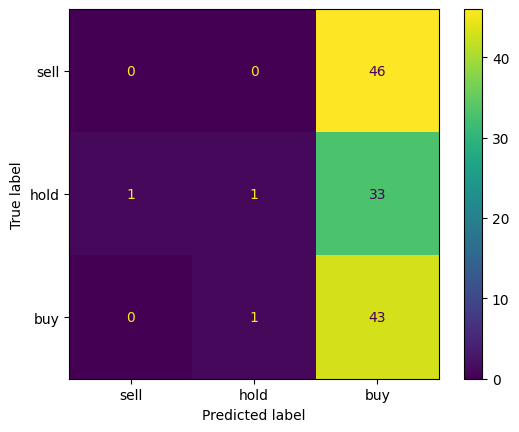

In [37]:
thre_preds = get_threshold_preds(softmax_preds,thre_buy=0.33333,thre_sell=0.303333)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(thre_preds,stock_y_test)
print(f"accuracy: {round(acc*100,2)}")

cm = confusion_matrix(stock_y_test, thre_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [441]:
best_model_path = 'fcn-best.pt'
model = FCN(
    num_features=num_features,
    num_classes=num_classes
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()

FCN(
  (fcn): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [443]:
features

Index(['EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2', 'SMACloseDiff2',
       'VWAP2', 'VolatilityStdDev2', 'Volatility2', 'Momentum2',
       'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4', 'SMACloseDiff4',
       'VWAP4', 'VolatilityStdDev4', 'Volatility4', 'Momentum4',
       'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8', 'SMACloseDiff8',
       'VWAP8', 'VolatilityStdDev8', 'Volatility8', 'Momentum8',
       'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolumeDiff128', 'EMACloseDiff128',
       'SMACloseDiff128', 'VWAP128', 'VolatilityStdDev128'

In [445]:
target

'Target'

In [447]:
## predict on top 10 stocks

stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    # "RR.L",
    "MU",
    "PDD",
]

for stock_name in stock_list:
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    
    # if use selectKbest
    stock_X_test = scaler.transform(stock_X_test)
    stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()
    stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

    stock_preds = model(stock_X_test)
    softmax_preds = nn.Softmax(dim=1)(stock_preds)
    _, class_preds = torch.max(softmax_preds, dim=1)
    
    acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

    print(f"{stock_name}: {round(acc*100,2)}")

# # choose top 10 from here

DDOG: 39.84
SNPS: 43.44
BKNG: 44.44
SMCI: 35.35
MDB: 36.59
NVDA: 38.39
MELI: 39.22
WDAY: 40.16
MU: 40.98
PDD: 42.62


# pnl calc

In [467]:
import pandas as pd
from datetime import datetime

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

# Print the filtered DataFrame
test_df

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 73

In [451]:
target

'Target'

In [461]:
model

FCN(
  (fcn): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [463]:
def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()
        
        stock_X_test = scaler.transform(stock_X_test)
        stock_X_test = selector.transform(stock_X_test)

        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model(stock_X_test)

        _, class_preds = torch.max(stock_preds, dim=1)
        class_preds = class_preds.detach().numpy()
        res[ticker] = pd.Series(class_preds)
        
        
    res = res.replace({0:-1, 1:0, 2:1})
    # res['Date'] = date
    # res = res.set_index('Date')
    # res = res.astype('int16')
    # res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    # res = res.div(res['total'], axis=0)
    # res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model)

In [465]:
res

,CDNS,CPRT,AMAT,MU,SMCI,MDB,BKNG,AVGO,INTC,TSLA,...,MKS.L,AMD,PANW,SNPS,ZS,WDAY,DDOG,LRCX,MELI,AMZN
0,1,0,1.0,1.0,-1.0,-1,0.0,1.0,1.0,-1.0,...,0,-1.0,1,1.0,1,1,1,1.0,1.0,1
1,0,0,1.0,1.0,-1.0,1,1.0,1.0,0.0,-1.0,...,0,-1.0,1,0.0,1,0,1,1.0,-1.0,0
2,0,0,0.0,1.0,1.0,1,0.0,1.0,0.0,-1.0,...,0,-1.0,0,0.0,1,1,0,0.0,1.0,0
3,0,0,0.0,0.0,1.0,1,0.0,1.0,0.0,-1.0,...,0,-1.0,0,0.0,1,0,0,0.0,0.0,0
4,0,0,0.0,0.0,1.0,1,0.0,0.0,0.0,-1.0,...,0,-1.0,0,0.0,-1,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,0,-1.0,-1.0,NaN,1,NaN,NaN,-1.0,NaN,...,0,NaN,-1,-1.0,0,0,1,NaN,NaN,0
141,1,0,-1.0,-1.0,NaN,1,NaN,NaN,NaN,NaN,...,1,NaN,1,-1.0,0,1,0,NaN,NaN,0
142,1,-1,NaN,-1.0,NaN,1,NaN,NaN,NaN,NaN,...,1,NaN,1,-1.0,-1,1,0,NaN,NaN,0
143,-1,0,NaN,-1.0,NaN,1,NaN,NaN,NaN,NaN,...,-1,NaN,1,-1.0,1,1,0,NaN,NaN,1


# inference.py

In [224]:
import torch.nn as nn
import torch.nn.functional as F

class FCN(nn.Module):
    def __init__(self,num_features,num_classes):        
        super(FCN, self).__init__()
        self.fcn = nn.Sequential(
            nn.Linear(num_features, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            nn.Tanh(),
            nn.Dropout(0.5),          
            
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.fcn(x)
        return x


def load_model(model_path,num_features=26,num_classes):
    model = FCN(
        num_features=num_features,
        num_classes=num_classes
    )
    model.load_state_dict(torch.load(best_model_path,map_location=device))
    model.eval()

    return model

In [221]:
model_path = 'fcn.pt'

model = load_model(model_path=model_path)

TypeError: __init__() missing 2 required positional arguments: 'num_features' and 'num_classes'

In [ ]:
def evaluate(X_test,y_test):
    criterion = nn.CrossEntropyLoss()

    # load best pretraining model
    best_model_path = 'fcn.pt'
    model = FCN()
    model.load_state_dict(torch.load(best_model_path,map_location=device))
    model.eval()

    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    preds = model(X_test.to(device))
    softmax_preds=nn.Softmax(dim=1)(preds)
    test_loss = criterion(softmax_preds,y_test.long())
    print("test loss: ",test_loss)
    test_acc = round(get_accuracy(softmax_preds,y_test)*100,2)
    print("test acc: ",test_acc)
    
    return preds

In [474]:
# load best pretraining model
best_model_path = 'fcn.pt'
model2 = FCN(20,3)
model2.load_state_dict(torch.load(best_model_path,map_location=device))
model2.eval()

RuntimeError: Error(s) in loading state_dict for FCN:
	Missing key(s) in state_dict: "fcn.3.weight", "fcn.3.bias", "fcn.4.running_mean", "fcn.4.running_var", "fcn.7.weight", "fcn.7.bias". 
	Unexpected key(s) in state_dict: "fcn.8.weight", "fcn.8.bias", "fcn.5.weight", "fcn.5.bias", "fcn.5.running_mean", "fcn.5.running_var", "fcn.5.num_batches_tracked". 
	size mismatch for fcn.4.weight: copying a param with shape torch.Size([256, 1024]) from checkpoint, the shape in current model is torch.Size([256]).

# last pnl

In [37]:
device=torch.device('cpu')

In [39]:
import torch.nn as nn
import torch.nn.functional as F

class FCN(nn.Module):
    def __init__(self,num_features,num_classes):        
        super(FCN, self).__init__()
        # self.f = nn.Flatten()
        self.fcn = nn.Sequential(
            nn.Linear(num_features, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            nn.Tanh(),
            nn.Dropout(0.5),          
            
            nn.Linear(256, num_classes),
        )


    def forward(self, x):
        # x = self.f(x)
        x = self.fcn(x)
        return x

In [41]:
best_model_path = 'fcn-best.pt'
model = FCN(
    num_features=20,
    num_classes=3
)
model.load_state_dict(torch.load(best_model_path))
model.eval()

FCN(
  (fcn): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [55]:
# df=pd.read_csv("temp.csv")

In [43]:
import pandas as pd
from datetime import datetime

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

# Print the filtered DataFrame
test_df

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_11267/254771661.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Target
2354,2024-07-01 09:30:00-04:00,30.910000,31.020000,30.615000,30.789499,30.789499,6793245,-0.005199,0.077893,0.003811,...,0.001200,0.001299,0.541269,0.247473,0.990494,-0.594999,0.68,0.002611,INTC,2
2355,2024-07-01 10:30:00-04:00,30.786900,30.870001,30.700001,30.870001,30.870001,3242517,0.002611,-0.239284,-0.353808,...,0.003826,0.003921,0.541198,0.247262,0.997899,-0.830000,0.68,-0.001297,INTC,1
2356,2024-07-01 11:30:00-04:00,30.860001,30.950001,30.799999,30.830000,30.830000,2365949,-0.001297,-0.210855,-0.156294,...,0.002518,0.002618,0.541218,0.246930,1.001820,-0.849998,0.68,-0.002598,INTC,0
2357,2024-07-01 12:30:00-04:00,30.825001,30.825001,30.665001,30.750000,30.750000,1907661,-0.002598,-0.160045,-0.107237,...,-0.000095,-0.000004,0.541184,0.246822,1.003099,-0.840000,0.68,0.001300,INTC,1
2358,2024-07-01 13:30:00-04:00,30.750000,30.850000,30.680000,30.790001,30.790001,2027832,0.001300,-0.038458,0.030535,...,0.001094,0.000975,0.538606,0.238828,1.029370,-0.830000,0.68,0.000649,INTC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,473.820007,475.260010,471.769989,473.769989,473.769989,1751198,0.000148,-0.161092,-0.342124,...,-0.048297,-0.043341,20.204107,0.301629,0.945743,2.490021,0.68,-0.001162,META,1
76727,2024-07-31 11:30:00-04:00,473.730011,475.000000,472.880005,473.220001,473.220001,1342196,-0.001162,-0.156181,-0.132218,...,-0.049226,-0.044301,20.262393,0.300908,0.952690,1.119995,0.68,-0.002506,META,0
76728,2024-07-31 12:30:00-04:00,473.119995,475.929993,471.220001,472.035400,472.035400,1547612,-0.002506,-0.009179,0.071083,...,-0.051425,-0.046520,20.325751,0.300964,0.950867,3.709991,0.68,0.001407,META,1
76729,2024-07-31 13:30:00-04:00,472.059998,473.970001,469.420013,472.700012,472.700012,1553672,0.001407,-0.001773,0.001954,...,-0.049895,-0.045002,20.385228,0.300744,0.947828,3.549988,0.68,-0.001440,META,1


In [45]:
stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    # "RR.L",
    "MU",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]
test_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Target
4857,2024-07-01 09:30:00-04:00,133.350006,133.550003,131.529999,131.820007,131.820007,1262273,-0.008235,0.130380,0.164205,...,-0.088739,-0.100332,5.896215,0.388633,0.955494,1.020004,0.68,0.001630,PDD,1
4858,2024-07-01 10:30:00-04:00,131.820007,132.169998,130.050003,132.035004,132.035004,1509205,0.001630,0.094925,0.089098,...,-0.087123,-0.098545,5.931056,0.388483,0.961653,1.119995,0.68,0.004647,PDD,2
4859,2024-07-01 11:30:00-04:00,132.035004,133.050003,131.919998,132.649994,132.649994,476763,0.004647,-0.386639,-0.519868,...,-0.082754,-0.094279,5.961136,0.388666,0.965429,0.130005,0.68,0.000302,PDD,1
4860,2024-07-01 12:30:00-04:00,132.660004,133.059998,132.520004,132.690002,132.690002,272799,0.000302,-0.381359,-0.272111,...,-0.082354,-0.094022,5.991852,0.388636,0.963967,-0.460007,0.68,0.000678,PDD,1
4861,2024-07-01 13:30:00-04:00,132.679993,132.970001,132.410004,132.779999,132.779999,213691,0.000678,-0.261732,-0.121499,...,-0.081568,-0.093603,6.028412,0.387346,0.952784,-0.440002,0.68,-0.001281,PDD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69211,2024-07-30 11:30:00-04:00,106.059998,106.110001,103.910004,104.589996,104.589996,63047127,-0.013957,-0.085409,-0.169092,...,-0.157433,-0.156948,6.145156,0.515751,0.872944,1.199997,0.68,0.007145,NVDA,2
69212,2024-07-30 12:30:00-04:00,104.589996,105.349998,102.540001,105.339996,105.339996,60621384,0.007145,-0.043714,-0.019615,...,-0.151002,-0.150110,6.250951,0.516106,0.878565,1.809998,0.68,0.005578,NVDA,2
69213,2024-07-30 13:30:00-04:00,105.330002,106.290001,104.760002,105.929199,105.929199,42720603,0.005578,-0.138893,-0.173219,...,-0.145852,-0.144823,6.349960,0.515882,0.876400,0.529999,0.68,-0.013871,NVDA,0
69214,2024-07-30 14:30:00-04:00,105.930000,106.480003,104.279999,104.470001,104.470001,41919527,-0.013871,-0.057637,-0.009464,...,-0.157164,-0.156043,6.464712,0.516733,0.859322,1.200005,0.68,-0.007325,NVDA,0


In [108]:
# features = df.columns[8:-4]
# print(len(features))
# target = "Target"

65


In [49]:
test_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Target
4857,2024-07-01 09:30:00-04:00,133.350006,133.550003,131.529999,131.820007,131.820007,1262273,-0.008235,0.130380,0.164205,...,-0.088739,-0.100332,5.896215,0.388633,0.955494,1.020004,0.68,0.001630,PDD,1
4858,2024-07-01 10:30:00-04:00,131.820007,132.169998,130.050003,132.035004,132.035004,1509205,0.001630,0.094925,0.089098,...,-0.087123,-0.098545,5.931056,0.388483,0.961653,1.119995,0.68,0.004647,PDD,2
4859,2024-07-01 11:30:00-04:00,132.035004,133.050003,131.919998,132.649994,132.649994,476763,0.004647,-0.386639,-0.519868,...,-0.082754,-0.094279,5.961136,0.388666,0.965429,0.130005,0.68,0.000302,PDD,1
4860,2024-07-01 12:30:00-04:00,132.660004,133.059998,132.520004,132.690002,132.690002,272799,0.000302,-0.381359,-0.272111,...,-0.082354,-0.094022,5.991852,0.388636,0.963967,-0.460007,0.68,0.000678,PDD,1
4861,2024-07-01 13:30:00-04:00,132.679993,132.970001,132.410004,132.779999,132.779999,213691,0.000678,-0.261732,-0.121499,...,-0.081568,-0.093603,6.028412,0.387346,0.952784,-0.440002,0.68,-0.001281,PDD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69211,2024-07-30 11:30:00-04:00,106.059998,106.110001,103.910004,104.589996,104.589996,63047127,-0.013957,-0.085409,-0.169092,...,-0.157433,-0.156948,6.145156,0.515751,0.872944,1.199997,0.68,0.007145,NVDA,2
69212,2024-07-30 12:30:00-04:00,104.589996,105.349998,102.540001,105.339996,105.339996,60621384,0.007145,-0.043714,-0.019615,...,-0.151002,-0.150110,6.250951,0.516106,0.878565,1.809998,0.68,0.005578,NVDA,2
69213,2024-07-30 13:30:00-04:00,105.330002,106.290001,104.760002,105.929199,105.929199,42720603,0.005578,-0.138893,-0.173219,...,-0.145852,-0.144823,6.349960,0.515882,0.876400,0.529999,0.68,-0.013871,NVDA,0
69214,2024-07-30 14:30:00-04:00,105.930000,106.480003,104.279999,104.470001,104.470001,41919527,-0.013871,-0.057637,-0.009464,...,-0.157164,-0.156043,6.464712,0.516733,0.859322,1.200005,0.68,-0.007325,NVDA,0


In [47]:
def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()
        # stock_X_test = pca.transform(stock_X_test)
        stock_X_test = scaler.transform(stock_X_test)
        stock_X_test = selector.transform(stock_X_test)
        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model(stock_X_test)

        _, class_preds = torch.max(stock_preds, dim=1)
        class_preds = class_preds.detach().numpy()
        res[ticker] = pd.Series(class_preds)
        # print(len(stock_X_test))
        
    res = res.replace({0:-1, 1:0, 2:1})
    res['Date'] = test_df.Datetime.unique()
    res = res.set_index('Date')
    res = res.astype('int16')
    res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    res = res.div(res['total'], axis=0)
    res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model)

ValueError: Length of values (149) does not match length of index (145)

In [508]:
res

,MU,SMCI,MDB,BKNG,PDD,NVDA,SNPS,WDAY,DDOG,MELI
Date,,,,,,,,,,
2024-07-01 09:30:00-04:00,0.111111,0.111111,-0.111111,0.000000,-0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2024-07-01 10:30:00-04:00,0.142857,-0.142857,0.142857,0.000000,0.142857,0.142857,0.000000,0.000000,0.142857,0.142857
2024-07-01 11:30:00-04:00,0.166667,-0.166667,0.166667,0.000000,0.166667,0.166667,0.000000,0.166667,0.000000,0.000000
2024-07-01 12:30:00-04:00,0.000000,-0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
2024-07-01 13:30:00-04:00,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,-0.250000
...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:30:00-04:00,-0.125000,-0.125000,0.125000,0.125000,0.125000,-0.125000,-0.125000,0.000000,0.000000,0.125000
2024-07-31 11:30:00-04:00,-0.200000,0.200000,0.200000,0.000000,0.000000,-0.200000,-0.200000,0.000000,0.000000,0.000000
2024-07-31 12:30:00-04:00,-0.200000,0.200000,0.200000,0.000000,0.000000,-0.200000,-0.200000,0.000000,0.000000,0.000000


In [515]:
res.to_csv("fcn-best-haidi.csv")

# test

In [540]:
df = pd.read_csv("temp.csv")

In [542]:
def set_target(val):
    if val > 0.002:
        return 2
    elif val < -0.002:
        return 0
    else:
        return 1

df['Target'] = df["Log_Return_shift"].apply(lambda x: set_target(x))
df.Target.value_counts()

Target
2    27150
0    25323
1    24258
Name: count, dtype: int64

In [544]:

import pandas as pd
from datetime import datetime

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

# Print the filtered DataFrame
test_df

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_99351/2868282673.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Target
2354,2024-07-01 09:30:00-04:00,30.910000,31.020000,30.615000,30.789499,30.789499,6793245,-0.005199,0.077893,0.003811,...,0.001200,0.001299,0.541269,0.247473,0.990494,-0.594999,0.68,0.002611,INTC,2
2355,2024-07-01 10:30:00-04:00,30.786900,30.870001,30.700001,30.870001,30.870001,3242517,0.002611,-0.239284,-0.353808,...,0.003826,0.003921,0.541198,0.247262,0.997899,-0.830000,0.68,-0.001297,INTC,1
2356,2024-07-01 11:30:00-04:00,30.860001,30.950001,30.799999,30.830000,30.830000,2365949,-0.001297,-0.210855,-0.156294,...,0.002518,0.002618,0.541218,0.246930,1.001820,-0.849998,0.68,-0.002598,INTC,0
2357,2024-07-01 12:30:00-04:00,30.825001,30.825001,30.665001,30.750000,30.750000,1907661,-0.002598,-0.160045,-0.107237,...,-0.000095,-0.000004,0.541184,0.246822,1.003099,-0.840000,0.68,0.001300,INTC,1
2358,2024-07-01 13:30:00-04:00,30.750000,30.850000,30.680000,30.790001,30.790001,2027832,0.001300,-0.038458,0.030535,...,0.001094,0.000975,0.538606,0.238828,1.029370,-0.830000,0.68,0.000649,INTC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,473.820007,475.260010,471.769989,473.769989,473.769989,1751198,0.000148,-0.161092,-0.342124,...,-0.048297,-0.043341,20.204107,0.301629,0.945743,2.490021,0.68,-0.001162,META,1
76727,2024-07-31 11:30:00-04:00,473.730011,475.000000,472.880005,473.220001,473.220001,1342196,-0.001162,-0.156181,-0.132218,...,-0.049226,-0.044301,20.262393,0.300908,0.952690,1.119995,0.68,-0.002506,META,0
76728,2024-07-31 12:30:00-04:00,473.119995,475.929993,471.220001,472.035400,472.035400,1547612,-0.002506,-0.009179,0.071083,...,-0.051425,-0.046520,20.325751,0.300964,0.950867,3.709991,0.68,0.001407,META,1
76729,2024-07-31 13:30:00-04:00,472.059998,473.970001,469.420013,472.700012,472.700012,1553672,0.001407,-0.001773,0.001954,...,-0.049895,-0.045002,20.385228,0.300744,0.947828,3.549988,0.68,-0.001440,META,1


In [546]:
stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    # "RR.L",
    "MU",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]
test_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Target
4857,2024-07-01 09:30:00-04:00,133.350006,133.550003,131.529999,131.820007,131.820007,1262273,-0.008235,0.130380,0.164205,...,-0.088739,-0.100332,5.896215,0.388633,0.955494,1.020004,0.68,0.001630,PDD,1
4858,2024-07-01 10:30:00-04:00,131.820007,132.169998,130.050003,132.035004,132.035004,1509205,0.001630,0.094925,0.089098,...,-0.087123,-0.098545,5.931056,0.388483,0.961653,1.119995,0.68,0.004647,PDD,2
4859,2024-07-01 11:30:00-04:00,132.035004,133.050003,131.919998,132.649994,132.649994,476763,0.004647,-0.386639,-0.519868,...,-0.082754,-0.094279,5.961136,0.388666,0.965429,0.130005,0.68,0.000302,PDD,1
4860,2024-07-01 12:30:00-04:00,132.660004,133.059998,132.520004,132.690002,132.690002,272799,0.000302,-0.381359,-0.272111,...,-0.082354,-0.094022,5.991852,0.388636,0.963967,-0.460007,0.68,0.000678,PDD,1
4861,2024-07-01 13:30:00-04:00,132.679993,132.970001,132.410004,132.779999,132.779999,213691,0.000678,-0.261732,-0.121499,...,-0.081568,-0.093603,6.028412,0.387346,0.952784,-0.440002,0.68,-0.001281,PDD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69217,2024-07-31 10:30:00-04:00,114.129997,115.889999,114.050003,115.739998,115.739998,54324447,0.014256,-0.253971,-0.449407,...,-0.065304,-0.063027,6.630986,0.571675,0.955826,0.839996,0.68,-0.002763,NVDA,0
69218,2024-07-31 11:30:00-04:00,115.730003,116.470001,115.410004,115.420601,115.420601,41236682,-0.002763,-0.203369,-0.136957,...,-0.067735,-0.065380,6.648481,0.571571,0.958146,0.059998,0.68,0.000861,NVDA,1
69219,2024-07-31 12:30:00-04:00,115.430000,116.029999,114.739998,115.519997,115.519997,31361626,0.000861,-0.178205,-0.136023,...,-0.066808,-0.064402,6.663786,0.571376,0.964862,0.290001,0.68,0.006213,NVDA,2
69220,2024-07-31 13:30:00-04:00,115.529999,116.430000,114.250000,116.239998,116.239998,37471590,0.006213,-0.006107,0.088765,...,-0.060887,-0.058384,6.675801,0.571601,0.970450,1.180000,0.68,-0.001420,NVDA,1


In [548]:
features.shape,target

((65,), 'Target')

In [550]:
X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

(1490, 65) (1490,)


In [554]:
best_model_path = 'fcn-best.pt'
model = FCN(
    num_features=20,
    num_classes=3
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()

FCN(
  (fcn): Sequential(
    (0): Linear(in_features=20, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

overall test accuracy: 41.01
acc-sell: 26.257
acc-hold: 50.111
acc-buy: 48.606


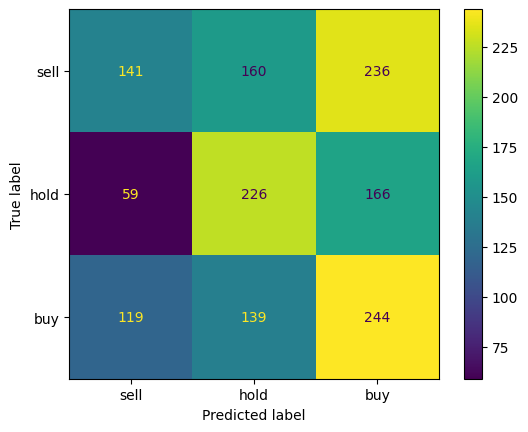

In [556]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

best_model_path = 'fcn-best.pt'
model = FCN(
    num_features=20,
    num_classes=3
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()

X_test2 = torch.tensor(X_test, dtype=torch.float32)
y_test2 = torch.tensor(y_test, dtype=torch.float32)

X_test2 = scaler.transform(X_test2)
X_test2 = selector.transform(X_test2)
X_test2 = torch.tensor(X_test2, dtype=torch.float32)

preds = model(X_test2)
softmax_preds = nn.Softmax(dim=1)(preds)
_, class_preds = torch.max(preds, dim=1)

test_acc = accuracy_score(class_preds,y_test2)
print(f"overall test accuracy: {round(test_acc*100,2)}")

labels = ["sell","hold","buy"]
label_mapping = {i:labels[i] for i in range(len(labels))}

cm = confusion_matrix(y_test2, class_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
for i in range(len(cm)):
    print(f"acc-{label_mapping[i]}: {round(cm[i,i]/sum(cm[i])*100,3)}")

disp.plot()
plt.show()

In [558]:
test_df.shape

(1490, 77)

In [566]:
## predict on indiv stocks
final = []

for stock_name in test_df.stock_name.unique()[:-1]:
    stock_df = test_df[test_df['stock_name'] == stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    stock_X_test = scaler.transform(stock_X_test)
    stock_X_test = selector.transform(stock_X_test)
    stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)
    stock_y_test = stock_df[target].to_numpy()
    
    preds = model(stock_X_test)
    softmax_preds = nn.Softmax(dim=1)(preds)
    _, class_preds = torch.max(preds, dim=1)

    # stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, class_preds)

    y = []
    
    for i, v in enumerate(stock_y_test):
        if stock_y_test[i] == 1 or class_preds[i] == 1:
            continue
        if stock_y_test[i] == class_preds[i]:
            y.append(1)
        else:
            y.append(0)
    
    num_correct = sum([1 for x in y if x == 1])
    num_wrong = sum([1 for x in y if x == 0])
    
    relevant_acc = num_wrong / (num_correct + num_wrong)
    final.append((relevant_acc, stock_name))
    
    print(f"{stock_name}: {round(acc*100,2)} | {relevant_acc}")

final.sort()
final
# choose top 10 from here

PDD: 42.28 | 0.4423076923076923
SMCI: 40.27 | 0.4956521739130435
MU: 40.94 | 0.4659090909090909
BKNG: 42.95 | 0.5333333333333333
WDAY: 42.95 | 0.4634146341463415
MELI: 42.28 | 0.42424242424242425
MDB: 37.58 | 0.4563106796116505
SNPS: 42.95 | 0.48214285714285715
DDOG: 37.58 | 0.547945205479452


[(0.42424242424242425, 'MELI'),
 (0.4423076923076923, 'PDD'),
 (0.4563106796116505, 'MDB'),
 (0.4634146341463415, 'WDAY'),
 (0.4659090909090909, 'MU'),
 (0.48214285714285715, 'SNPS'),
 (0.4956521739130435, 'SMCI'),
 (0.5333333333333333, 'BKNG'),
 (0.547945205479452, 'DDOG')]